In [365]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [366]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [367]:
# get titanic & test csv files as a DataFrame
train = pd.read_csv("input/train.csv")
test    = pd.read_csv("input/test.csv")

full = train.append( test , ignore_index = True )
titanic = full[ :891 ]

del train , test

print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)

Datasets: full: (1309, 12) titanic: (891, 12)


In [368]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [369]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


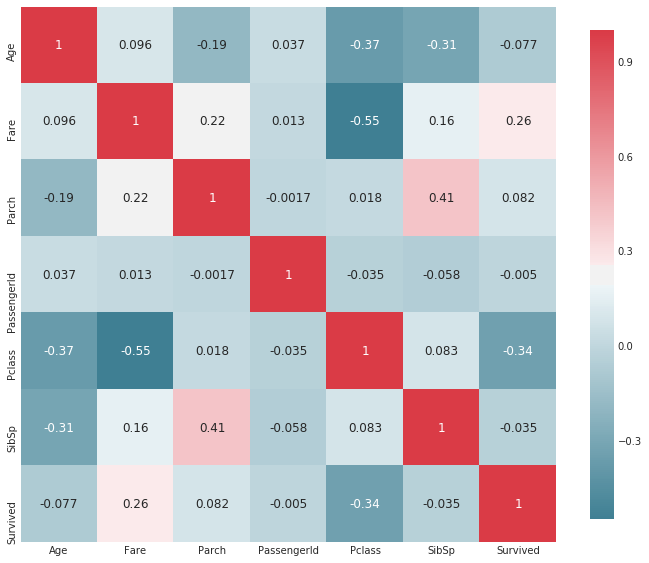

In [370]:
plot_correlation_map(titanic)

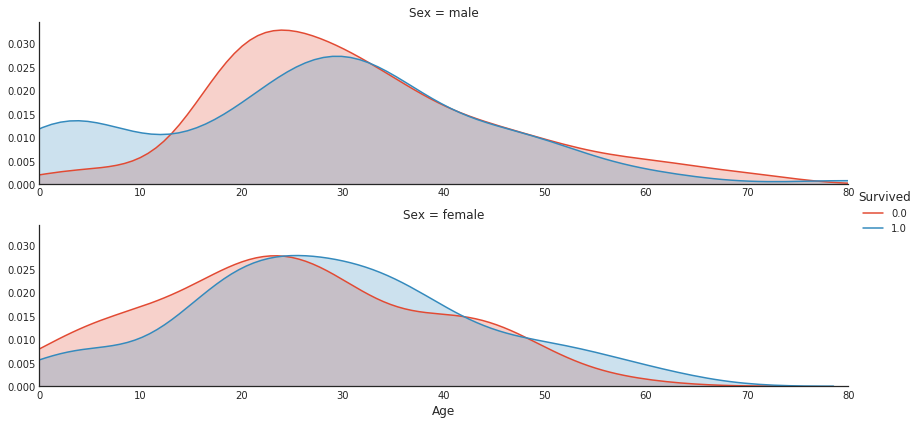

In [371]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex' )

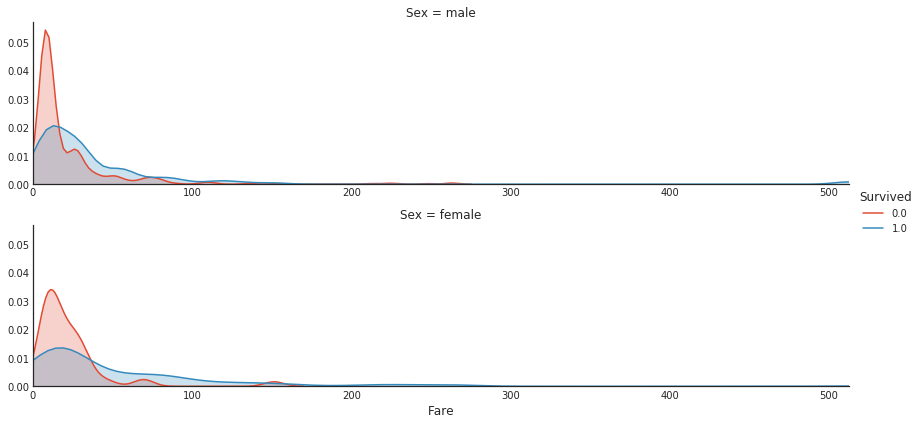

In [372]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( titanic , var = 'Fare' , target = 'Survived' , row = 'Sex' )

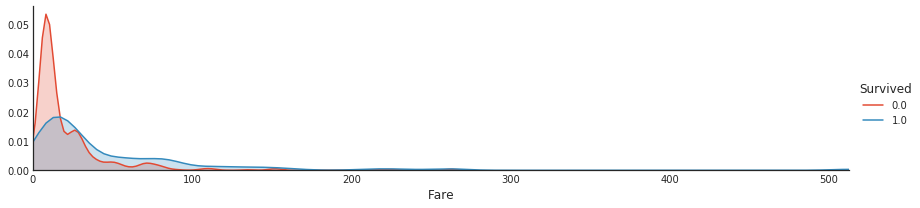

In [373]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( titanic , var = 'Fare' , target = 'Survived' )

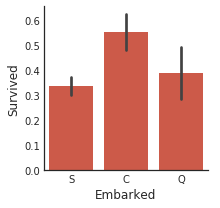

In [374]:
# Plot survival rate by Embarked
plot_categories( titanic , cat = 'Embarked' , target = 'Survived' )

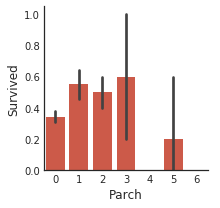

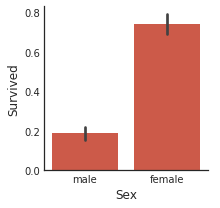

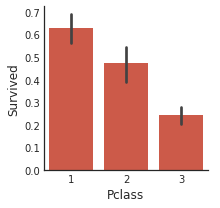

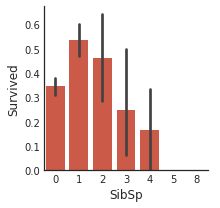

In [375]:
# Plot survival rate by Parch
plot_categories( titanic , cat = 'Parch' , target = 'Survived' )
plot_categories( titanic , cat = 'Sex' , target = 'Survived' )
plot_categories( titanic , cat = 'Pclass' , target = 'Survived' )
plot_categories( titanic , cat = 'SibSp' , target = 'Survived' )

In [376]:
# Transform Sex into binary values 0 and 1
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )

In [377]:
# Create a new variable for every unique value of Embarked
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [378]:
# Create dataset
imputed = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
imputed[ 'Age' ] = full.Age.fillna( full.Age.mean() )

# Fill missing values of Fare with the average of Fare (mean)
imputed[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )

imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [379]:
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [380]:
cabin = pd.DataFrame()

# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )

# dummy encoding ...
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )

cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [381]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

# Extracting dummy variables from tickets:
ticket[ 'Ticket' ] = full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

print(ticket.shape)
ticket.head()

(1309, 37)


,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [382]:
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [383]:
# Select which features/variables to include in the dataset from the list below:
# imputed , embarked , pclass , sex , family , cabin , ticket

full_X = pd.concat( [ imputed , embarked , cabin , sex, family ] , axis=1 )
full_X.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex,FamilySize,Family_Single,Family_Small,Family_Large
0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,1,2,0,1,0
1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,1,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0


In [384]:
# Create all datasets that are necessary to train, validate and test models
train_valid_X = full_X[ 0:891 ]
train_valid_y = titanic.Survived
test_X= full_X[ 891: ]
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

print (full_X.shape, train_valid_y.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 19) (891,) (623, 19) (268, 19) (623,) (268,) (418, 19)


0.987158908507


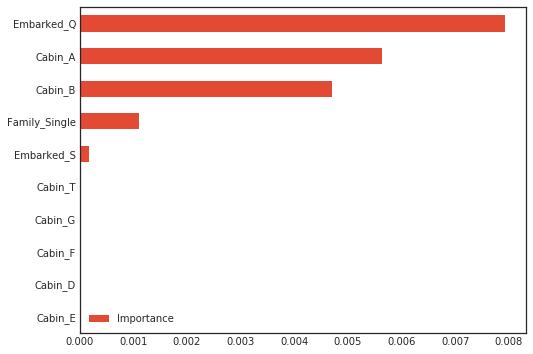

In [385]:
plot_variable_importance(train_X, train_y)

In [386]:
model = KNeighborsClassifier(n_neighbors = 7)


In [387]:
model.fit( train_X , train_y )


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [388]:
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))


0.77849117175 0.738805970149


In [389]:
from sklearn.model_selection import cross_val_score

X = train_valid_X 
y = train_valid_y

#search for an optimal value of K dor KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.69380234933605722, 0.69717200090795584, 0.71959510838724328, 0.69940755873340144, 0.71627482692089428, 0.70164198161389169, 0.72412722732947454, 0.6882589944387697, 0.70950743388945636, 0.69493701055498813, 0.6971595165134491, 0.69266485075473849, 0.70837078651685403, 0.70617353308364539, 0.70838355464759961, 0.70955652025876736, 0.70393911020315514, 0.70396379525593011, 0.69381284757689254, 0.70060492566110544, 0.69609749177164915, 0.7073340143003064, 0.7050621382362956, 0.70509930768357731, 0.69837050278061508, 0.69946856202474172, 0.69951935081148564, 0.70623595505617975, 0.6972213710135059, 0.71296504369538072]


Text(0,0.5,'Cross-Validated Accuracy')

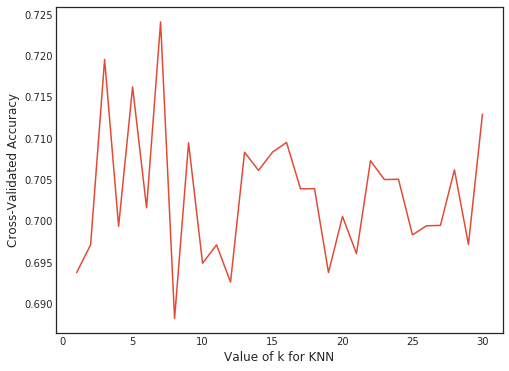

In [390]:
#plot the value of K for KNN verus the cross validated accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [391]:
#plot_model_var_imp(model, train_X, train_y)

In [392]:
test_X.head()
test_Y = model.predict( test_X )
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )
test.shape



(418, 2)

In [393]:
test_Y = y_pred_class
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )
test.shape
test.head()
test.to_csv( 'titanic_.csv' , index = False )

In [394]:
knn = KNeighborsClassifier(n_neighbors = 7)
X = train_valid_X 
y = train_valid_y
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.72412722732947454

# My data

In [395]:
# Full data
train_valid_X
train_valid_y
# Train data
train_X
train_y
# Test data
X_test = valid_X
y_test = valid_y
X_test
y_test
print(train_valid_X.shape, train_valid_y.shape, train_X.shape, train_y.shape, X_test.shape, y_test.shape)

(891, 19) (891,) (623, 19) (623,) (268, 19) (268,)


# Logistic regression

In [396]:
logreg = LogisticRegression()

In [397]:
logreg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [398]:
y_pred_class = logreg.predict(X_test)
print(y_test.shape, y_pred_class.shape)
y_pred_class[0:10]

(268,) (268,)


array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [399]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_class))

[[138  23]
 [ 31  76]]


In [400]:
# True positive
metrics.recall_score(y_test, y_pred_class)

0.71028037383177567

In [401]:
# Precision score (when a 1 value is predicted, how often is the prediction correct?)
metrics.precision_score(y_test, y_pred_class)

0.76767676767676762

Text(0,0.5,'Frequency')

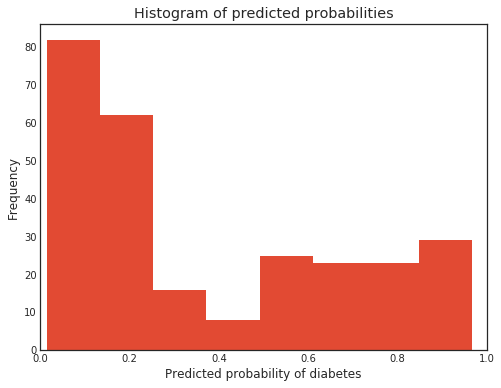

In [402]:
# Prepare for histogram
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

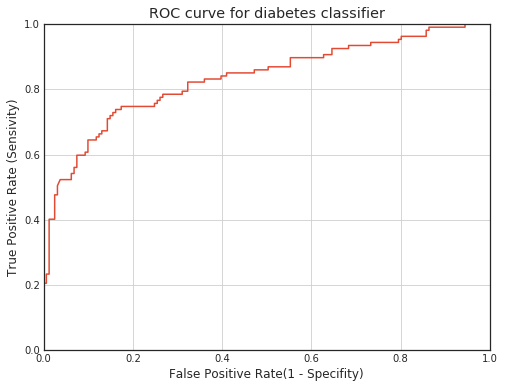

In [403]:
#IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate(1 - Specifity)')
plt.ylabel('True Positive Rate (Sensivity)')
plt.grid(True)

In [404]:
#predict diabetes if the predicted probability is greater than x    where x <0,1>
x = 0.8
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], x)[0]
metrics.precision_score(y_test, y_pred_class)

0.94594594594594594

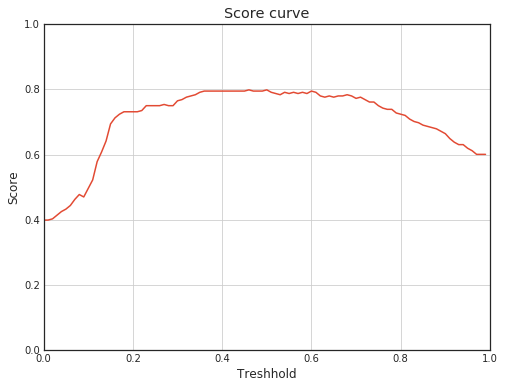

In [405]:
# Plot for treshhold of predicted probalities
from sklearn.preprocessing import binarize
from sklearn.metrics import accuracy_score

#prepare ylabel
ylabel = []
xlabel = []
for x in range(100):
    x /= 100
    y_pred_class = binarize([y_pred_prob], x)[0]
    ylabel.append(accuracy_score(y_test, y_pred_class))
    xlabel.append(x)

# Plot
plt.plot(xlabel, ylabel)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Score curve')
plt.xlabel('Treshhold')
plt.ylabel('Score')
plt.grid(True)

    

In [406]:
#predict diabetes if the predicted probability is greater than x    where x <0,1>
x = 0.5
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], x)[0]
print(metrics.precision_score(y_test, y_pred_class))
print(accuracy_score(y_test, y_pred_class))

0.767676767677
0.798507462687


In [407]:
# Find threshhold for the highest score
def whereThreshold(X, y):
    y_pred_prob = logreg.predict_proba(X)[:,1]
    y_pred_class = binarize([y_pred_prob], 0.001)[0]
    highest = accuracy_score(y_test, y_pred_class)
    for i in range(1000):
        i /= 1000
        y_pred_class = binarize([y_pred_prob], i)[0]
        temporary = accuracy_score(y_test, y_pred_class)
        if highest < temporary:
            highest = temporary
            threshold = i
    return (highest, threshold)

In [408]:
print(whereThreshold(X_test, y_test))

(0.79850746268656714, 0.432)


# Prepare to send

In [409]:
#logreg.fit(train_valid_X, train_valid_y)


In [410]:
y_pred_prob = logreg.predict_proba(test_X)[:,1]

In [411]:
y_pred_class = binarize([y_pred_prob],  0.592)[0]
y_pred_class.shape

(418,)

In [412]:
def ConvertIntoINT(y):
    table = []
    for i in range(y.shape[0]):
        table.append(int(y[i]))
    return table

In [413]:
y_pred = ConvertIntoINT(y_pred_class)
len(y_pred)

418

In [414]:
test_Y = y_pred
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )
test.shape
test.head()
test.to_csv( 'titanicGood.csv' , index = False )